# Linear regression


In [4]:
##conda install ipywidgets

In [1]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

In [2]:
#@title Interactive plot
sns.set()
sns.set_context("talk")


def plot_regression(slope, intercept):
    # Fixing the seed of the random number generator for reproducibility of the fake data
    np.random.seed(50)
    
    x = np.arange(1, 101)
    y = 3 * x + 20 + np.random.normal(0, 30, 100)
    y_pred = slope * x + intercept
    mse = np.mean((y-y_pred)**2)
    plt.plot(x, y, "o")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Scatter plot with the regression line")

    # We define two points to construct the line. Every line is defined by two points.
    x1, y1 = 0, intercept
    x2, y2 = 100, intercept + slope * 100
    l1 = [(x1, y1), (x2,y2)]
    
    lc = LineCollection([l1], color=["red"], lw=2)

    plt.gca().add_collection(lc)

    plt.show()
    
    print("The mean squared error (MSE) is: {:.2f} cm2".format(mse))
    print("The root mean square (RMSE) is: {:.2f} cm".format(np.sqrt(mse)))
    
#interactive_plot = interactive(plot_regression, alpha=(0,30), beta=(-100,100))
interactive_plot = interactive(plot_regression, slope=widgets.FloatSlider(min=0, max=40, step=0.5, value=0), 
                               intercept=widgets.FloatSlider(min=0, max=200, step=10, value=200))

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='slope', max=40.0, step=0.5), FloatSlider(value=200.0…

## Obtaining the model with Ordinary Least Squares

Let's type the equations with python

Values needed:

* $\bar{x}$
* $\bar{y}$
* $\bar{xy}$
* $\bar{x}^{2}$
* $\bar{x^{2}}$

$ \hat{y_{i}}=a+b*x_{i} $

$a = \bar{y} - \bar{x}\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$

$b=\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$


In [7]:
# Replicating the data
np.random.seed(50)
x = np.arange(1, 101)
y = 3 * x + 20 + np.random.normal(0, 30, 100)

In [8]:
# Slope
b = ( np.mean(x*y) - (np.mean(x)*np.mean(y)) ) / ( np.mean(x*x) - np.mean(x)**2)
# Intercept
a = np.mean(y) - np.mean(x)*b

print("The slope of the regression is: {:.2f}".format(b))
print("The intercept of the regression is: {:.2f}".format(a))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


### Making predictions

In [9]:
# Prediction for new data (drop diameter = 41)
print("The prediction for {} is {:.2f}".format(41,a + b * 41))

The prediction for 41 is 144.94


In [10]:
# Prediction for new data (drop diameter = 20)
print("The prediction for {} is {:.2f}".format(21,a + b * 21))

The prediction for 21 is 86.49


### Evaluating predictions

In [11]:
# Evaluating predictions
y_pred = a + b * x

# Compute:
# ME: mean error
ME = np.mean( y - y_pred )

# MAE: mean absolute error
MAE = np.mean( np.abs( y - y_pred ) )

# MSE: mean squared error
MSE = np.mean( np.power( y - y_pred , 2 ) )

# RMSE: root mean squared error
RMSE = np.sqrt(MSE)

# MAPE: mean absolute percentual error
MAPE = np.mean( np.abs( y - y_pred) / y ) 

Text(0.5, 1.0, 'Residual histogram')

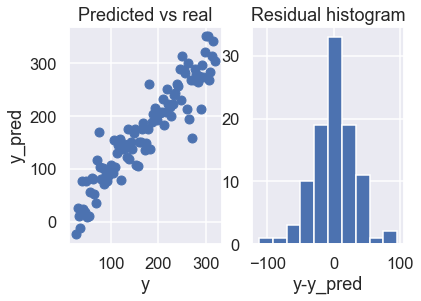

In [12]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,2)
ax[0].plot(y_pred, y, 'o')
ax[0].set_xlabel("y")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y - y_pred)
ax[1].set_xlabel("y-y_pred")
ax[1].set_title("Residual histogram")



### Plotting the linear model with seaborn

In [13]:
data = pd.DataFrame({"x":x, "y":y,"y_pred":y_pred})
data

,x,y,y_pred
0,1,-23.810563,28.036424
1,2,25.070672,30.958945
2,3,10.372147,33.881467
3,4,-11.937415,36.803988
4,5,77.358384,39.726509
...,...,...,...
95,96,268.796797,305.675960
96,97,284.306951,308.598482
97,98,314.158032,311.521003
98,99,342.992746,314.443524


<AxesSubplot:xlabel='y', ylabel='y_pred'>

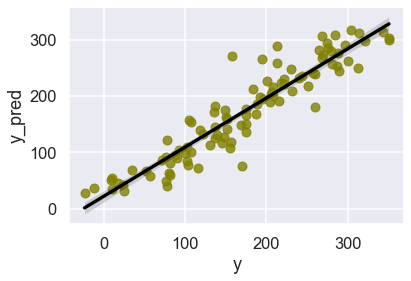

In [14]:
# sns.regplot(x =, y = , data=, scatter_kws ={'color': value}, line_kws={"color": "red"})
sns.regplot(x='y',y='y_pred', data=data, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

## Linear regression with scipy

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

In [15]:
import scipy.stats as stats
# slope, intercept, r_value, p_value, slope_std_err, intercept_std_error = stats.linregress(x,y); where x,y are numpy arrays
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

result = stats.linregress(x,y)
print("The slope of the regression is: {:.2f}".format(result.slope))
print("The intercept of the regression is: {:.2f}".format(result.intercept))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


### Linear model with Scikit-Learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# create the model
# linear_model.LinearRegression()
model = LinearRegression()

In [18]:
x.shape

(100,)

In [19]:
y.shape

(100,)

In [20]:
# fit the model
reg = model.fit(x.reshape(-1,1),y.reshape(-1,1))

print("The slope of the regression is: {:.2f}".format(reg.coef_[0][0]))
print("The intercept of the regression is: {:.2f}".format(reg.intercept_[0]))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


In [21]:
np.array([41, 21]).reshape(-1,1)

array([[41],
       [21]])

In [22]:
# make predictions
pred = model.predict(np.array([41, 21]).reshape(-1,1))
pred

array([[144.93728112],
       [ 86.4868524 ]])

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# The coefficient of determination: 1 is perfect prediction
print("The R2 is {:.2f}".format(r2_score(y,y_pred)))

The R2 is 0.87


# Data splitting

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Compute again the values of the slope and the intercept.
# How do they compare with the previous values?
reg_new = model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

print("The slope of the regression is: {:.2f}".format(reg_new.coef_[0][0]))
print("The intercept of the regression is: {:.2f}".format(reg_new.intercept_[0]))

The slope of the regression is: 2.92
The intercept of the regression is: 24.82


##  Improving 

In [26]:
# Now repeat this 100 times and get the corresponding values for the slope and the intercept point estimations!
# Store the resulting values in two lists:

slopes = []
intercepts = []

for i in range(1000):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

    reg_new = model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

    slopes.append(reg_new.coef_[0][0])
    intercepts.append(reg_new.intercept_[0])


Text(0.5, 1.0, 'Histogram of intercepts')

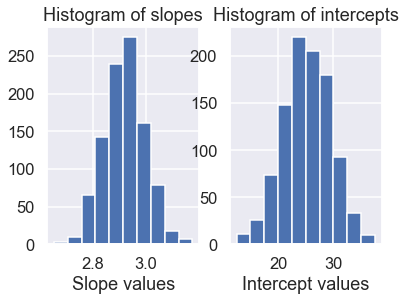

In [27]:
# Plot histograms for the slopes and the intercepts.

fig2, ax2 = plt.subplots(1,2)

ax2[0].hist(slopes)
ax2[0].set_xlabel("Slope values")
ax2[0].set_title("Histogram of slopes")

ax2[1].hist(intercepts)
ax2[1].set_xlabel("Intercept values")
ax2[1].set_title("Histogram of intercepts")
